AdaBoost Accuracy (SAMME): 0.98
Gradient Boosting Accuracy: 0.97

Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.97      0.97      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



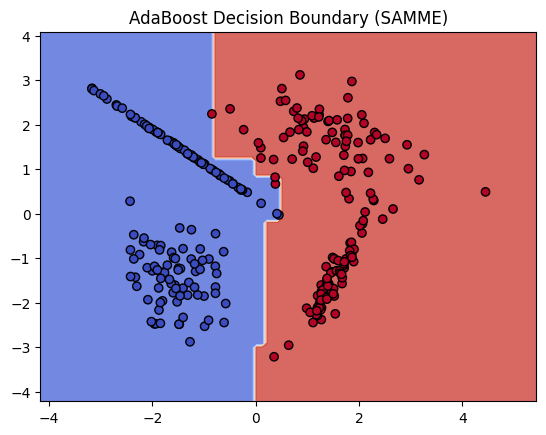

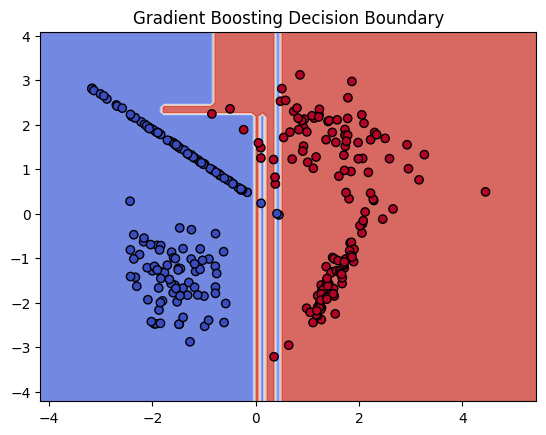

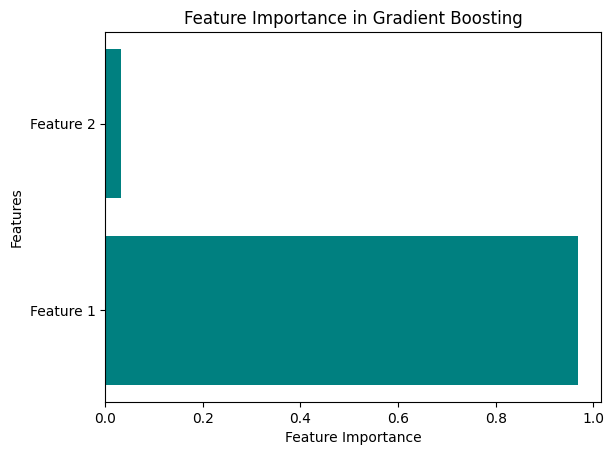

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    random_state=42,
    class_sep=1.5
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


adaboost = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',  
    random_state=42
)
adaboost.fit(X_train, y_train)


gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gboost.fit(X_train, y_train)


y_pred_adaboost = adaboost.predict(X_test)
y_pred_gboost = gboost.predict(X_test)


accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_gboost = accuracy_score(y_test, y_pred_gboost)
print(f"AdaBoost Accuracy (SAMME): {accuracy_adaboost:.2f}")
print(f"Gradient Boosting Accuracy: {accuracy_gboost:.2f}")


print("\nClassification Report (AdaBoost):")
print(classification_report(y_test, y_pred_adaboost))

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gboost))


def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.show()


plot_decision_boundary(X, y, adaboost, title="AdaBoost Decision Boundary (SAMME)")


plot_decision_boundary(X, y, gboost, title="Gradient Boosting Decision Boundary")


importances = gboost.feature_importances_
feature_names = ["Feature 1", "Feature 2"]

plt.barh(feature_names, importances, color='teal')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting")
plt.show()
